In [12]:
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import platform

In [2]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv('Pre_Season_Batter.csv')

# 정규시즌 데이터 로드
regular_season_df = pd.read_csv('Regular_Season_Batter.csv')

print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [3]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,0,0,0,26,0,0,0,0,0,...,0,26,24,0,802,0,802,0,1067,26


In [4]:
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'
]
num_cols = regular_season_df.select_dtypes(include=numerics).columns
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0, num_cols].head()


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
18,138,2013,NaN,2,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,0,NaN
175,21,2000,NaN,3,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,0,NaN
200,24,2002,NaN,1,0,0,0,0,0,0,...,0,1,0,0,0,0,NaN,NaN,0,NaN
265,31,2007,NaN,1,0,1,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,0,NaN
385,45,2007,NaN,3,0,0,0,0,0,0,...,0,1,0,0,0,0,NaN,NaN,0,NaN


In [5]:
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'
]

regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


In [8]:
day_by_day_df = pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,0,0,0,0,1,0,0,0,0.158,2018
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0.150,2018
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,0,0,0,0,0,0,1,0,0.182,2018
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0.182,2018


In [9]:
preseason_df = pd.read_csv('Pre_Season_Batter.csv')
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = preseason_df[
    preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833


In [10]:
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1)>0, not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,starting_salary
0,가르시아,LG,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN


In [11]:
drop_idx = regular_season_df.loc[((regular_season_df['H']>0)&(regular_season_df['SLG']==0)) | 
(((regular_season_df['H']>0) | (regular_season_df['BB']>0) | (regular_season_df['HBP']>0)) & (regular_season_df['OBP']==0))
].index

regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True)
regular_season_df


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


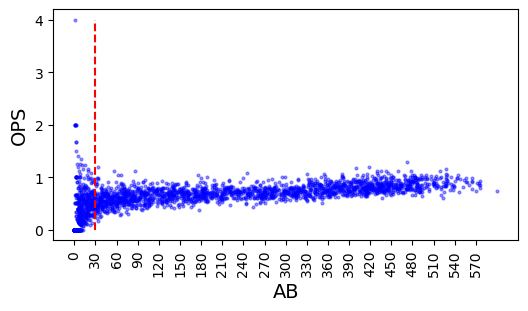

In [15]:
plt.figure(figsize=(6,3))
plt.plot('AB', 'OPS', data=regular_season_df, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']), 30)), rotation=90)
plt.vlines(30, ymin=min(regular_season_df['OPS']), ymax=max(regular_season_df['OPS']), linestyles='dashed', colors='r')
plt.show()

In [16]:
Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) |
                      (regular_season_df['OPS'] > (Q3 + 1.5 + IQR))
                    ].sort_values(by=['AB'], axis=0, ascending=False)[['batter_name', 'AB', 'year', 'OPS']].head(10)

,batter_name,AB,year,OPS
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1874,정경운,15,2018,0.130000
1902,정병곤,15,2018,0.130000
1453,이민재,14,2012,0.142857
1305,유선정,13,2008,0.153846
1844,장영석,12,2012,0.077000
2015,정현석,12,2017,0.000000


In [18]:
day_by_day_df[['date']].head()

,date
0,3.24
1,3.25
2,3.27
3,3.28
4,3.29


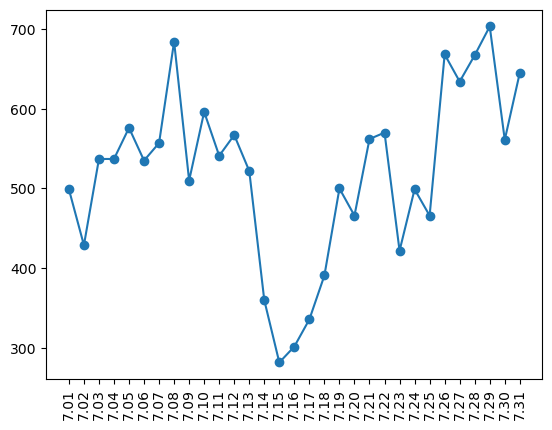

In [17]:
major_ticks = list(np.round(np.linspace(7.01, 7.31, 31), 2))
july = (day_by_day_df['date']>=7) & (day_by_day_df['date']<8)
plt.plot(major_ticks, day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

In [19]:
def lag_function(df, var_name, past):
    df.reset_index(drop=True, inplace=True)
    
    df['lag' + str(past) + '_' + var_name] = np.nan
    df['lag' + str(past) + '_' + 'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0,(max(df.index)+1)):
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & (df['year'] == df['year'][i] - past), col]
            
            if len(val)!=0:
                df.loc[i, 'lag'+str(past)+'_'+col] = val.iloc[0]
    df.loc[df['lag'+ str(past) + '_' + 'AB'] < 30,
            'lag'+str(past)+'_'+var_name] = np.nan
    df.drop('lag'+str(past)+'_'+'AB', axis=1, inplace=True)
    return df

/var/folders/gb/lgnb9qp11ks2430g518_45f00000gn/T/ipykernel_19107/662497973.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = regular_season_temp.corr()


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

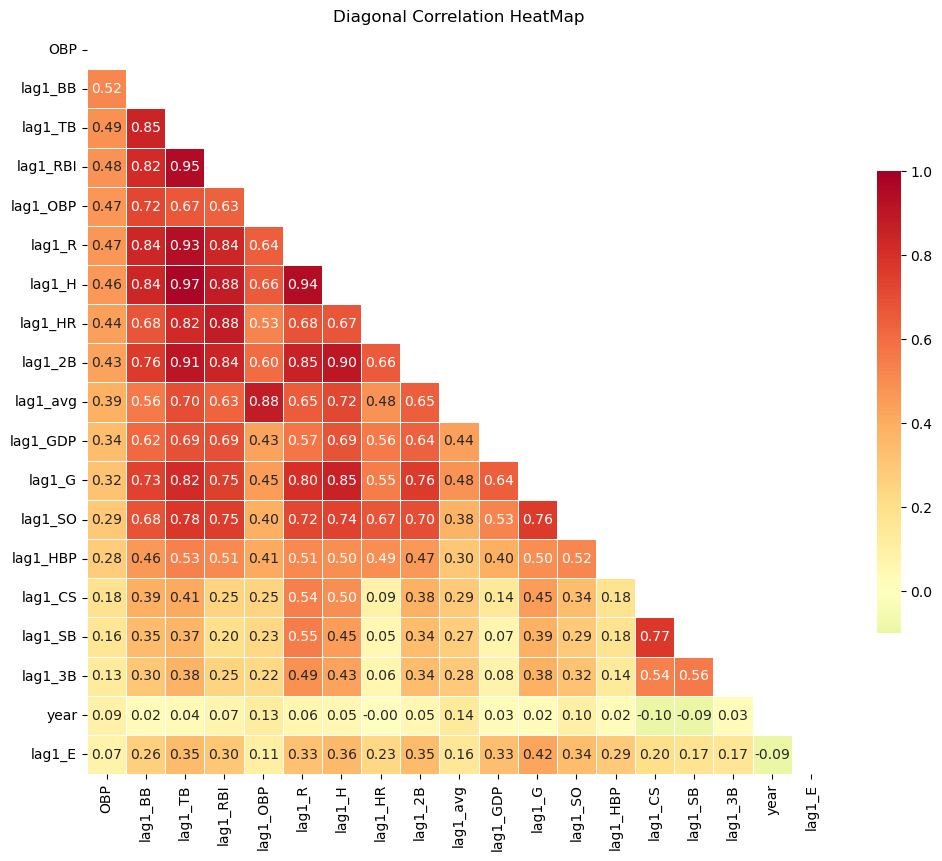

In [24]:
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'
]
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(['batter_id', 'year', 'OPS', 'SLG'], axis=1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] > 30]

for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('OBP')
regular_season_temp.drop(numeric_cols, axis=1, inplace=True)

corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by='OBP', axis=0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

f, ax = plt.subplots(figsize=(12,12))
corr = regular_season_temp.select_dtypes(exclude=['object','bool']).corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={'shrink':.5})
plt.title('Diagonal Correlation HeatMap')